<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Neural_Networks/Convolution2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

import requests
import io

#Importing data

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

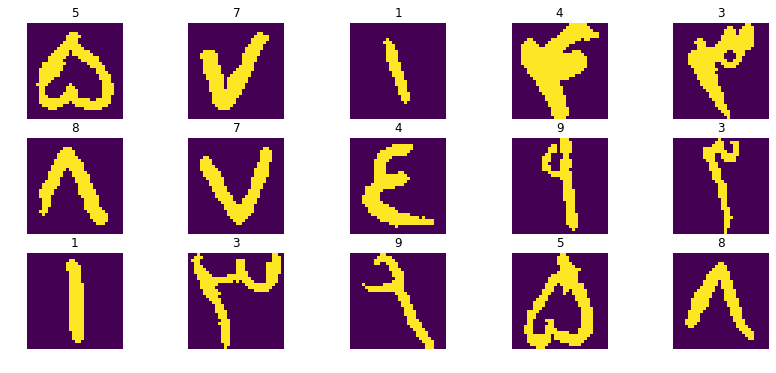

In [4]:
fig = plt.figure(figsize=(14,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1, title=Y[i])
  ax.imshow(X[i])
  ax.axis('off')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)

#Creating Neural Network

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),  
])


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 673,226
Trainable params: 673,226
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
his = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


Train on 69087 samples, validate on 7677 samples
Epoch 1/10
69087/69087 [==============================] - 12s 177us/sample - loss: 0.1423 - acc: 0.9590 - val_loss: 0.0605 - val_acc: 0.9828
Epoch 2/10
69087/69087 [==============================] - 12s 173us/sample - loss: 0.0468 - acc: 0.9853 - val_loss: 0.0529 - val_acc: 0.9837
Epoch 3/10
69087/69087 [==============================] - 12s 174us/sample - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0490 - val_acc: 0.9866
Epoch 4/10
69087/69087 [==============================] - 12s 174us/sample - loss: 0.0192 - acc: 0.9934 - val_loss: 0.0429 - val_acc: 0.9878
Epoch 5/10
69087/69087 [==============================] - 12s 174us/sample - loss: 0.0169 - acc: 0.9945 - val_loss: 0.0496 - val_acc: 0.9852
Epoch 6/10
69087/69087 [==============================] - 12s 173us/sample - loss: 0.0145 - acc: 0.9952 - val_loss: 0.0503 - val_acc: 0.9883
Epoch 7/10
69087/69087 [==============================] - 12s 170us/sample - loss: 0.0128 - acc: 0.9958 -

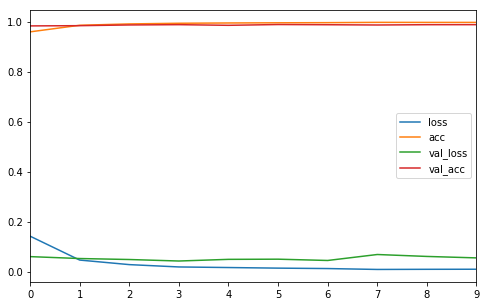

In [16]:
import pandas as pd
pd.DataFrame(his.history).plot(figsize=(8,5))

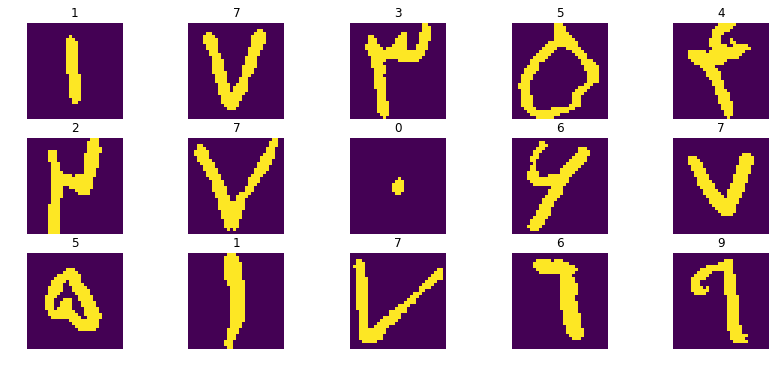

In [22]:
y_pred =np.argmax( model.predict(X_test), axis=1)

fig = plt.figure(figsize=(14,6))
for i in range(15):
  ax = fig.add_subplot(3,5,i+1, title=y_pred[i])
  ax.imshow(X_test[i])
  ax.axis('off')

In [23]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_pred)
print(cm)

[[2435    0    0    0    1   29    0    0    0    0]
 [   0 2524    1    0    0    0    2    0    1    4]
 [   1    0 2519   34    2    0    5    0    0    0]
 [   0    0   32 2577   18    2    1    0    0    1]
 [   1    0   12   32 2506    1    1    0    1    4]
 [   2    1    1    1   10 2484    1    0    2    0]
 [   0    3    7    1    1    6 2619    2    1   15]
 [   1    1    3    0    3    3    0 2584    0    0]
 [   0    3    0    0    1    1    0    0 2472    8]
 [   0    1    0    0    0    2    9    0    2 2590]]


#And Now ...
#Convolutional Neural Networks

In [0]:
n_w, n_h = X[0].shape

model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(n_h, n_w, 1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    
])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
__________

In [27]:
model.compile(loss ='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
X_train = X_train.reshape(-1, n_h, n_w, 1)
X_test = X_test.reshape(-1, n_h, n_w, 1)
his = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Train on 61411 samples, validate on 15353 samples
Epoch 1/10
61411/61411 [==============================] - 51s 832us/sample - loss: 0.2176 - acc: 0.9359 - val_loss: 0.0674 - val_acc: 0.9793
Epoch 2/10
61411/61411 [==============================] - 51s 827us/sample - loss: 0.0462 - acc: 0.9857 - val_loss: 0.0323 - val_acc: 0.9891
Epoch 3/10
61411/61411 [==============================] - 51s 826us/sample - loss: 0.0318 - acc: 0.9897 - val_loss: 0.0321 - val_acc: 0.9896
Epoch 4/10
61411/61411 [==============================] - 51s 825us/sample - loss: 0.0241 - acc: 0.9924 - val_loss: 0.0262 - val_acc: 0.9913
Epoch 5/10
61411/61411 [==============================] - 51s 826us/sample - loss: 0.0198 - acc: 0.9934 - val_loss: 0.0327 - val_acc: 0.9908
Epoch 6/10
61411/61411 [==============================] - 51s 831us/sample - loss: 0.0164 - acc: 0.9945 - val_loss: 0.0389 - val_acc: 0.9885
Epoch 7/10
61411/61411 [==============================] - 51s 824us/sample - loss: 0.0129 - acc: 0.9958 

In [28]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
print(cmmo)

[[2463    0    0    1    1    0    0    0    0    0]
 [   2 2522    2    0    0    0    0    1    0    5]
 [   0    0 2548    8    0    0    2    2    0    1]
 [   0    0   23 2606    0    1    1    0    0    0]
 [   1    0   10   21 2521    1    3    0    0    1]
 [   5    0    0    0    3 2492    1    0    1    0]
 [   0    0    6    0    5    2 2625    2    0   15]
 [   1    0    3    0    1    0    0 2590    0    0]
 [   0    1    0    0    1    1    0    0 2481    1]
 [   0    1    2    0    0    2    5    0    0 2594]]


In [29]:
model.evaluate(X_test, y_test)

25588/25588 [==============================] - 9s 353us/sample - loss: 0.0206 - acc: 0.9943


[0.020553628916739917, 0.9942942]